**Telco Churn Prediction using ANN**

In [1]:
#importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential #builds neural networks
from tensorflow.keras.layers import Dense,Flatten,Dropout

Reading the data

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Descriptive Statistics

In [4]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

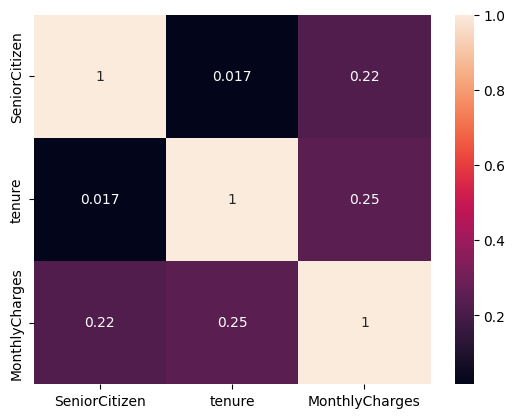

In [5]:
sns.heatmap(df.corr(),annot=True)

Converting to correct data type to check for any missing value

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Imputing missing values

In [8]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy="mean")
df[["TotalCharges"]]=si.fit_transform(df[["TotalCharges"]])

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df=df.iloc[:,1:]      #removing customer id

DATA CLEANING


In [12]:
for i in df.select_dtypes(object).columns:
  print(f"{i} : {df[i].unique()}")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Some of the columns have no service and no separately which can be classified in a single category no

In [13]:
df.replace("No internet service","No",inplace=True)
df.replace("No phone service","No",inplace=True)

In [14]:
for i in df.select_dtypes(object).columns:
  print(f"{i} : {df[i].unique()}")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Exploratory Data Analysis

Churn Ratio

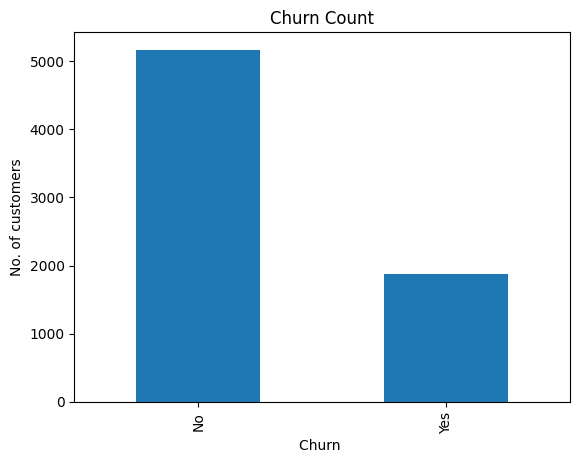

In [15]:
(df["Churn"].value_counts()).plot(kind="bar")
plt.title("Churn Count")
plt.xlabel("Churn ")
plt.ylabel("No. of customers")
plt.show()

Gender Distribution

In [16]:
df["gender"].value_counts()/df.shape[0]*100

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

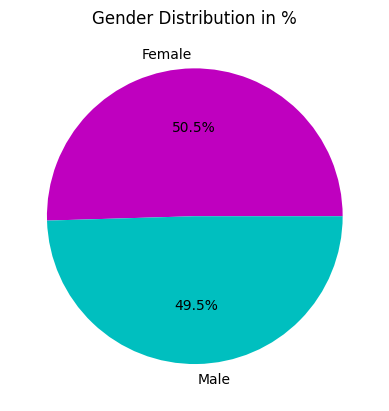

In [17]:
plt.pie(df["gender"].value_counts()*100/df.shape[0],labels=df["gender"].unique(),colors=["m","c"],autopct="%1.1f%%")
plt.title("Gender Distribution in %")
plt.show()

Gender wise Distribution of senior citizen 

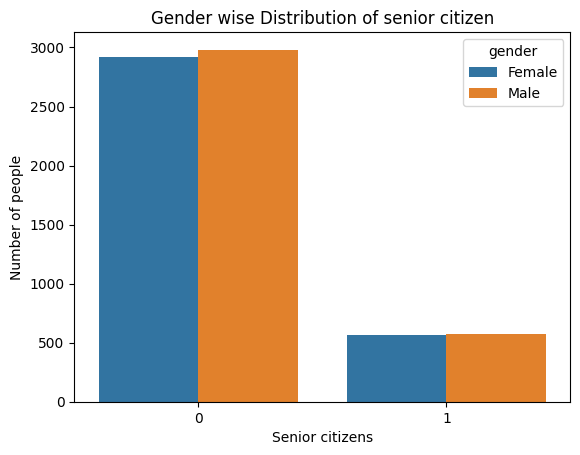

In [18]:
sns.countplot(x=df["SeniorCitizen"],hue=df["gender"])
plt.title("Gender wise Distribution of senior citizen")
plt.xlabel("Senior citizens")
plt.ylabel("Number of people")
plt.show()

Gender wise churn

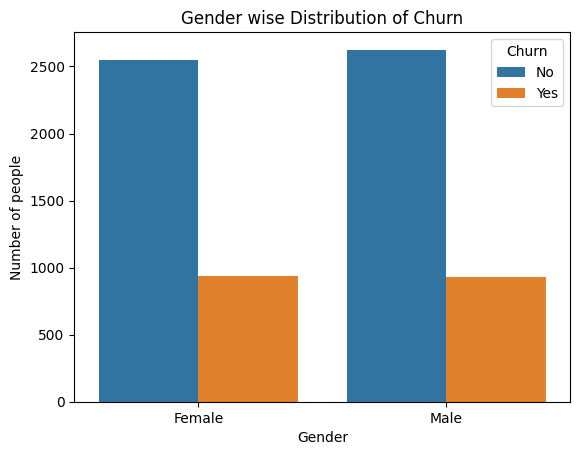

In [19]:
sns.countplot(x=df["gender"],hue=df["Churn"])

plt.title("Gender wise Distribution of Churn")
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.show()

Distribution of contract type

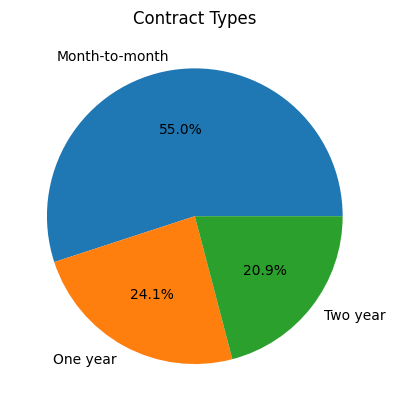

In [20]:
plt.pie(df["Contract"].value_counts(),labels=df["Contract"].unique(),autopct="%1.1f%%",explode=(0.,0.,0.))
plt.title("Contract Types")
plt.show()

Churn distribution of customer in various sectors

In [21]:
service=df.select_dtypes(object).columns[3:-4]

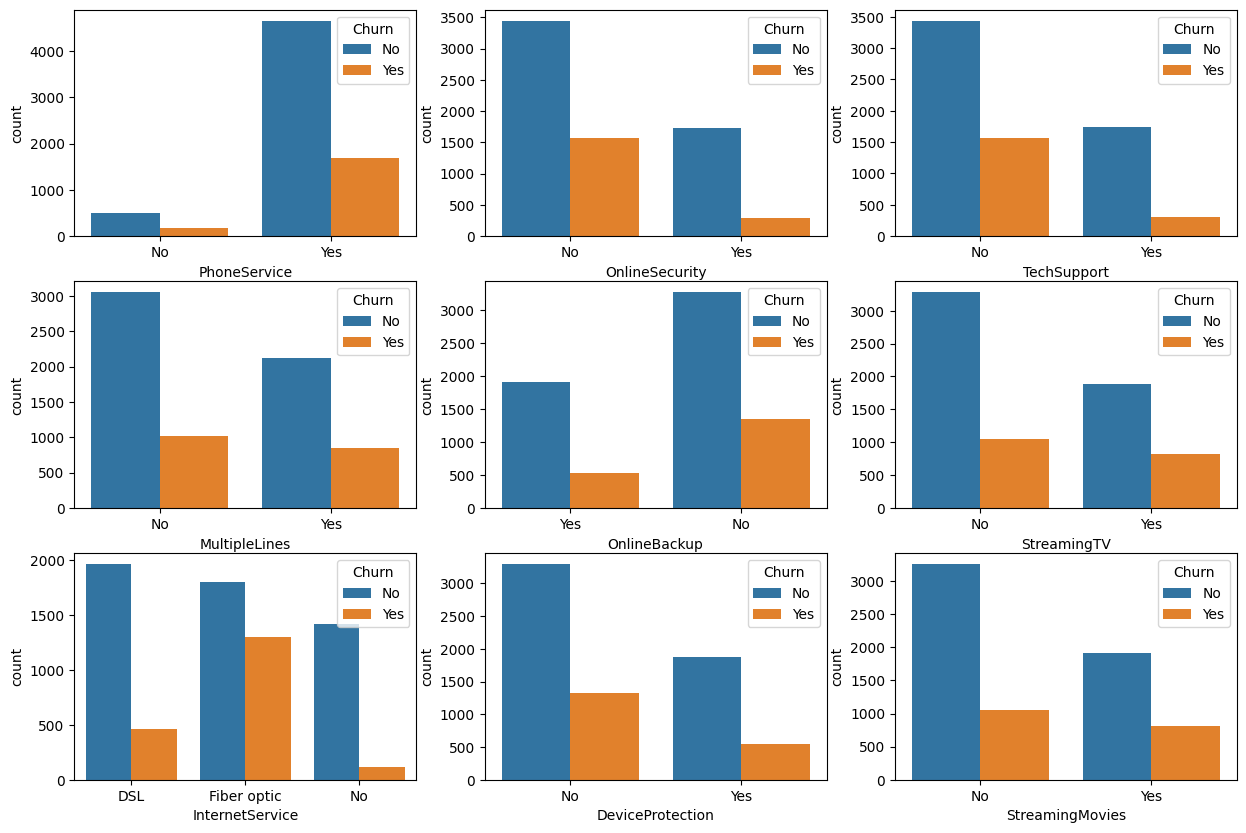

In [22]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,10))

for i,j in enumerate(service):
  if i<3:
    sns.countplot(x=df[j],hue=df["Churn"],ax=axes[i,0])
  elif i>=3 and i<6:
    sns.countplot(x=df[j],hue=df["Churn"],ax=axes[i-3,1])
  elif i<9:
    sns.countplot(x=df[j],hue=df["Churn"],ax=axes[i-6,2]) 
  

Relation between features and target

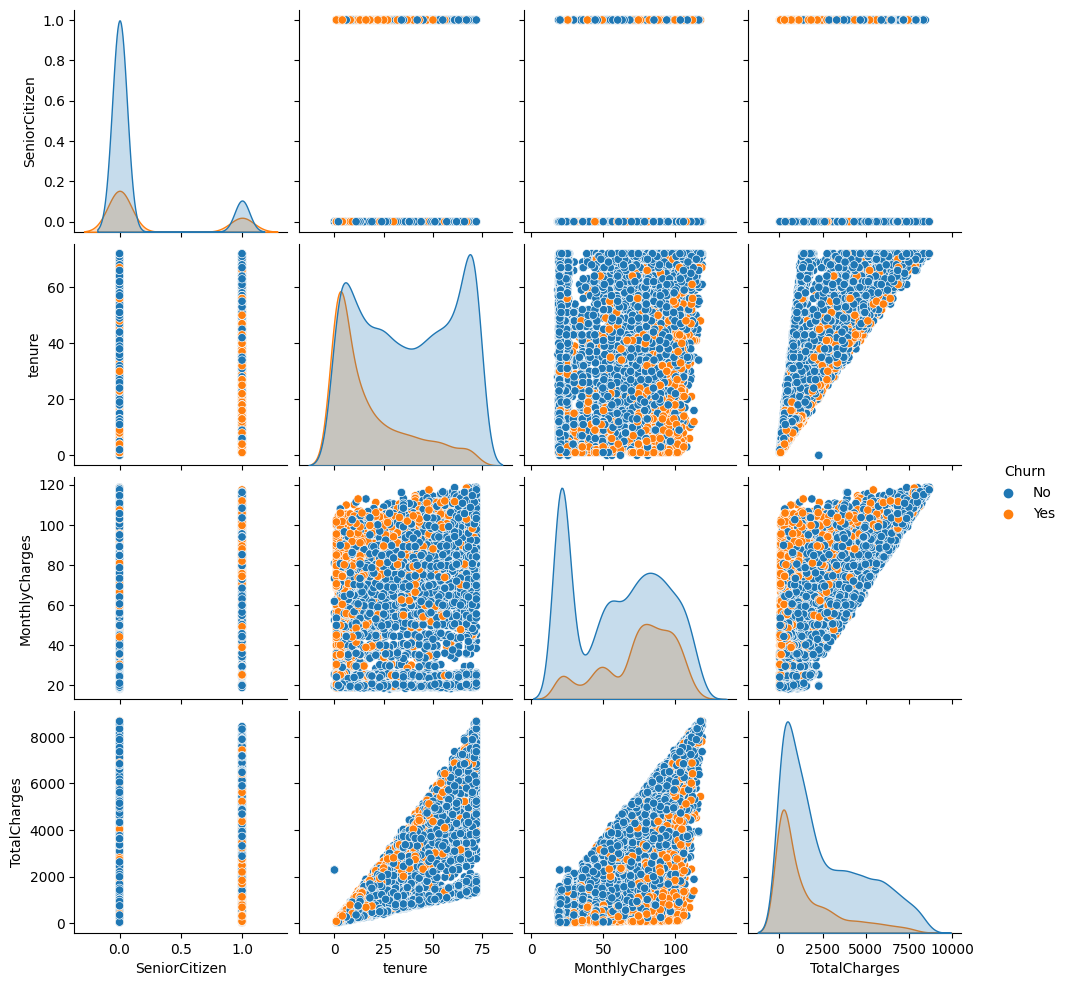

In [23]:
sns.pairplot(df,hue="Churn")

Data Encoding

In [24]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
catcol=df.select_dtypes(object).columns
df[catcol]=oe.fit_transform(df[catcol])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


In [25]:
df["Churn"]=df["Churn"].astype(int)

Splitting the features and target

In [26]:
x=df.iloc[:,:-1]
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
3,1.0,0,0.0,0.0,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,84.80,1990.50
7039,0.0,0,1.0,1.0,72,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103.20,7362.90
7040,0.0,0,1.0,1.0,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45
7041,1.0,1,1.0,0.0,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60


In [27]:
y=df.iloc[:,-1].values
y

array([0, 0, 1, ..., 0, 1, 0])

Splitting training and testing data

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
 

Checking if the data is balanced

In [29]:
df["Churn"].value_counts()/df.shape[0]*100

0    73.463013
1    26.536987
Name: Churn, dtype: float64

This is an IMBALANCED DATA so performing SMOTE Technique 

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
#Applying smote to training data
st=SMOTE(random_state=1)
xtrain_new,ytrain_new=st.fit_resample(xtrain,ytrain)

Feature Scaling



In [32]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()

xtrain_new=mn.fit_transform(xtrain_new)
xtest=mn.transform(xtest)

Early stopping for overcoming Overfitting issue

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,min_delta=1,patience=25)


Building Neural Network

In [43]:
#Step 1: Initialize the model
ann=Sequential()
#Step 2: Add Layers into the model
# 1st Hidden Layer
ann.add(Dense(units=128,activation="relu"))
# Drop out Layer for 1st hidden layer 
ann.add(Dropout(rate=0.2))
# 2nd hidden Layer
ann.add(Dense(units=128,activation="relu"))
# Drop out Layer for 2nd hidden layer 
ann.add(Dropout(rate=0.1))

#Output Layer
ann.add(Dense(units=1,activation="sigmoid"))        #since its binary classification

#Step 3: Establish connection between layers
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

#Step 4:Train the model
ann.fit(xtrain_new,ytrain_new,validation_data=(xtest,ytest),epochs=800,verbose=1,callbacks=[early_stop])


Epoch 1/800
258/258 [==============================] - 1s 3ms/step - loss: 0.5076 - accuracy: 0.7552 - val_loss: 0.4916 - val_accuracy: 0.7445
Epoch 2/800
258/258 [==============================] - 1s 2ms/step - loss: 0.4688 - accuracy: 0.7784 - val_loss: 0.4387 - val_accuracy: 0.7729
Epoch 3/800
258/258 [==============================] - 1s 2ms/step - loss: 0.4548 - accuracy: 0.7818 - val_loss: 0.4832 - val_accuracy: 0.7530
Epoch 4/800
258/258 [==============================] - 1s 2ms/step - loss: 0.4439 - accuracy: 0.7905 - val_loss: 0.4524 - val_accuracy: 0.7693
Epoch 5/800
258/258 [==============================] - 1s 2ms/step - loss: 0.4364 - accuracy: 0.7941 - val_loss: 0.4966 - val_accuracy: 0.7381
Epoch 6/800
258/258 [==============================] - 1s 3ms/step - loss: 0.4282 - accuracy: 0.8044 - val_loss: 0.4520 - val_accuracy: 0.7679
Epoch 7/800
258/258 [==============================] - 1s 3ms/step - loss: 0.4185 - accuracy: 0.8057 - val_loss: 0.4402 - val_accuracy: 0.7850

<Figure size 200x200 with 0 Axes>

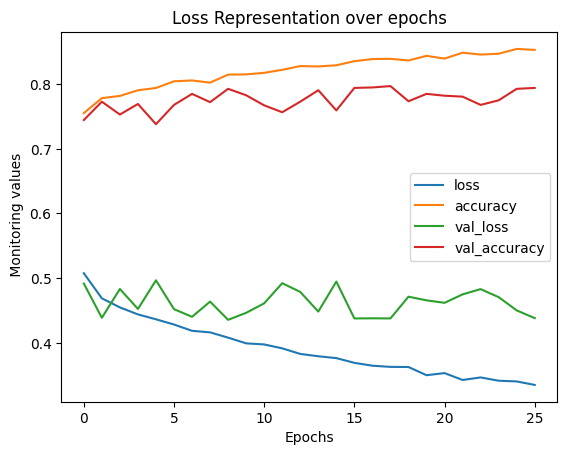

In [48]:
lossdata=pd.DataFrame(ann.history.history)
plt.figure(figsize=(2,2))
lossdata.plot()

plt.title("Loss Representation over epochs")
plt.xlabel("Epochs")
plt.ylabel(" Monitoring values")
plt.show()

In [49]:
#Step 5 : Predicting 
ypred=ann.predict(xtest)
ypred

45/45 [==============================] - 0s 941us/step


array([[0.08973236],
       [0.0286712 ],
       [0.446712  ],
       ...,
       [0.00239313],
       [0.05342298],
       [0.5621679 ]], dtype=float32)

These are probablistic values so converting them in binary format by specifing the threshold value 

In [50]:
ypred=np.where(ypred>0.5,1,0)
ypred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

Actual VS predicted values

In [51]:
pd.DataFrame({"Actual Value":ytest,"Predicted Value":ypred.flatten()})

,Actual Value,Predicted Value
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
1404,1,0
1405,0,0
1406,0,0
1407,0,0


Evaluation of model

In [52]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f"Accuracy:{accuracy_score(ytest,ypred)}\n{confusion_matrix(ytest,ypred)}\n{classification_report(ytest,ypred)}")

Accuracy:0.794180269694819
[[927 134]
 [156 192]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1061
           1       0.59      0.55      0.57       348

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409

